# 2. Efficient Array Computing

This episode introduces how to write high-performance numerical code in Python packages (Numpy, Pandas, and Scipy) by leveraging tools and libraries designed to optimize computation speed and memory usage. It explores strategies such as vectorization with NumPy, just-in-time compilation using Numba, and parallelization techniques that can significantly reduce execution time. These methods help Python developers overcome the traditional performance limitations of the language, making it suitable for intensive scientific and engineering applications.


:::{objectives} Learning objectives
- Understand limitations of Python’s standard library for large data processing
- Understand the logic behind NumPy ndarrays and learn to use some NumPy numerical computing tools
- Learn to use data structures and analysis tools from Panda

:::

:::{instructor-note}
- 25 min teaching/type-along
- 25 min exercising

:::

## 2.1 Why can Python be slow?

Computer programs are nowadays practically always written in a high-level human readable programming language and then translated to the actual machine instructions that a processor understands. There are two main approaches for this translation:
- For **compiled** programming languages, the translation is done by a compiler before the execution of the program
- For **interpreted** languages, the translation is done by an interpreter during the execution of the program

## 2.2 NumPy

NumPy is based on well-optimized C code, which gives much better performace than regular Python. In particular, by using homogeneous data structures, NumPy *vectorizes* mathematical operations where fast pre-compiled code can be applied to a sequence of data instead of using traditional `for` loops.

### 2.2.1 Arrays

The core of NumPy is the NumPy `ndarray` (n-dimensional array). Compared to a Python list, an ndarray is similar in terms of serving as a data container. Some differences between the two are:
- ndarrays can have multiple dimensions, *e.g.* a 1-D array is a vector, a 2-D array is a matrix
- ndarrays are fast only when all data elements are of the same type

![](./images/python-list-vs-numpy-array.svg)

### 2.2.2 Creating NumPy arrays

One way to create a NumPy array is to convert from a Python list, but make sure that the list is homogeneous (contains same data type) otherwise performace will be downgraded. Since appending elements to an existing array is slow, it is a common practice to preallocate the necessary space with `np.zeros` or `np.empty` when converting from a Python list is not possible.

:::{demo} Code for demonstration

```python
import numpy as np

a = np.array((1, 2, 3, 4), float)
print(f"a = {a}\n")
# array([ 1., 2., 3., 4.])

list1 = [[1, 2, 3], [4, 5, 6]]
mat = np.array(list1, complex)
# create complex array, with imaginary part equal to zero
print(f"mat = \n {mat} \n")
# array([[ 1.+0.j, 2.+0.j, 3.+0.j],
#       [ 4.+0.j, 5.+0.j, 6.+0.j]])

print(f"mat.shape={mat.shape}, mat.size={mat.size}")
# mat.shape=(2, 3), mat.size=6
```

:::

:::{caution}

You should copy the code above to a separate code block, or change its cell type from from `Markdown` to `Code`.
:::

`arange` and `linspace` can generate ranges of numbers:

In [1]:
import numpy as np

a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
b = np.arange(0.1, 0.2, 0.02)
print(b)

[0.1  0.12 0.14 0.16 0.18]


In [3]:
c = np.linspace(-4.5, 4.5, 5)
print(c)

[-4.5  -2.25  0.    2.25  4.5 ]


### 2.2.3 Array operations and manipulations

All the familiar arithmetic operators in NumPy are applied elementwise:

In [4]:
# 1D example

import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f" a + b = {a + b}\n a / b = {a / b}")

 a + b = [5 7 9]
 a / b = [0.25 0.4  0.5 ]


![](./images/np_add_1d_new.svg)

![](./images/np_div_1d_new.svg)

::::{exercise}

Run the code below to get familiar with indexing in a 2D example.
    
```python
# 2D example

import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[10, 10, 10], [10, 10, 10]])

print(a+b)

```

:::{note}

You can either copy the code from the cell above or download the code example from [HERE](./code/code-example.py).

:::


:::{solution}

```python
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[10, 10, 10], [10, 10, 10]])

print(a+b)
```

```
[[11 12 13]
 [14 15 16]]

```

![](./images/np_add_2d.svg)

:::

::::

### 2.2.4 Array indexing

Basic indexing is similar to Python lists. Note that advanced indexing creates copies of arrays.

In [5]:
# 1D example

import numpy as np

data = np.array([1,2,3,4,5,6,7,8])

# integer indexing
print("Integer indexing")
print(f"data = {data}")
print(f"data[3] = {data[3]}")
print(f"data[0:2] = {data[0:2]}")
print(f"data[-2] = {data[-2]}")
print(f"data[::-4] = {data[::-4]}")

# fancy indexing
print("\nFancy indexing")
print(f"data[[1,6,3]] = {data[[1,6,3]]}")

# boolean indexing
print("\nBoolean indexing")
print(f"data[data>5] = {data[data>5]}")

Integer indexing
data = [1 2 3 4 5 6 7 8]
data[3] = 4
data[0:2] = [1 2]
data[-2] = 7
data[::-4] = [8 4]

Fancy indexing
data[[1,6,3]] = [2 7 4]

Boolean indexing
data[data>5] = [6 7 8]


![](./images/array-indexing-1D.png){w=30em align=center}

:::{exercise}

Run the code below to get familiar with indexing in a 2D example.

```python
# 2D example

data = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])

# integer indexing
print("Integer indexing")
print(f"data[1] = {data[1]}")
print(f"data[:, 1] = {data[:, 1]}")
print(f"data[1:3, 2:4] = {data[1:3, 2:4]}")

# fancy indexing
print("\nFancy indexing")
print(f"data[[0,2,1], [2,3,0]] = {data[[0,2,1], [2,3,0]]}")

# boolean indexing
print("\nBoolean indexing")
print(f"data[data>10] = {data[data>10]}")
```

:::

:::{caution}

Again, you should move the code above to a separate code block, or change its cell type from from `Markdown` to `Code`.

:::

### 2.2.5 I/O with NumPy

Numpy provides functions for reading from/writing to files. Both ASCII and binary formats are supported with the CSV and npy/npz formats.

**CSV**

The `numpy.loadtxt()` and `numpy.savetxt()` functions can be used. They save in a regular column layout and can deal with different delimiters, column titles and numerical representations.

In [6]:
a = np.array([1, 2, 3, 4])
np.savetxt("my_array.csv", a)
b = np.loadtxt("my_array.csv")

print(a == b)

[ True  True  True  True]


:::{attention}

If you get an eror like xxx, you should import numpy before the first line `import numpy as np`.

:::

**Binary**

The npy format is a binary format used to dump arrays of any shape. Several arrays can be saved into a single npz file, which is simply a zipped collection of different npy files. All the arrays to be saved into a npz file can be passed as kwargs to the `numpy.savez()` function. The data can then be recovered using the `numpy.load()` method, which returns a dictionary-like object in which each key points to one of the arrays.

In [12]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

np.savez("my_arrays.npz", array_1=a, array_2=b)
data = np.load("my_arrays.npz")

print(data['array_1'] == a) # [ True  True  True  True]
print(data['array_2'] == b) # [ True  True  True  True]


[ True  True  True  True]


### 2.2.6 Random numbers

The module `numpy.random` provides several functions for constructing random arrays
- `random()`: uniform random numbers
- `normal()`: normal distribution
- `choice()`: random sample from given array
- …

In [8]:
print(np.random.random((2,2)),'\n')

[[0.22119482 0.40071875]
 [0.13960031 0.44234418]] 



In [9]:

print(np.random.choice(np.arange(4), 10))

[3 1 1 0 2 2 1 0 3 2]


:::{warning}

You might get different results from the above code example.

:::

## 2.3 Pandas

Pandas is a Python package that provides high-performance and easy to use data structures and data analysis tools. The core data structures of Pandas are Series and Dataframes.
- a Pandas `series` is a one-dimensional NumPy array with an index which we could use to access the data
- a `dataframe` consist of a table of values with labels for each row and column. A dataframe can combine multiple data types, such as numbers and text, but the data in each column is of the same type.
- each column of a dataframe is a series object - a dataframe is thus a collection of series.

![](./images/pandas_dataframe.svg){w=30em align=center}

### 2.3.1 Data analysis workflow

Pandas is a powerful tool for many steps of a data analysis pipeline:

To explore some of the capabilities, we start with an example dataset containing the passenger list from the Titanic, which is often used in Kaggle competitions and data science tutorials. First step is to load Pandas and download the dataset into a dataframe.

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"

# set the index to the "Name" column
titanic = pd.read_csv(url, index_col="Name")

:::{note}

Pandas also understands multiple other formats, for example `read_excel()`, `read_hdf()`, `read_json()`, *etc.* (and corresponding methods to write to file: `to_csv()`, `to_excel()`, `to_hdf()`, `to_json()`, …)…)

:::

We can now view the dataframe to get an idea of what it contains and print some summary statistics of its numerical data:

```python
# print the first 5 lines of the dataframe
print(titanic.head())

# print some information about the columns
print(titanic.info())

# print summary statistics for each column
print(titanic.describe())
```

### 2.3.2 Missing/invalid data

What if your dataset has missing data? Pandas uses the value np.nan to represent missing data, and by default does not include it in any computations. We can find missing values, drop them from our dataframe, replace them with any value we like or do forward or backward filling.

```python
titanic.isna()                           # returns boolean mask of NaN values

print(titanic.dropna())                  # drop missing values
print(titanic.dropna(how="any"))         # or how="all"
print(titanic.dropna(subset=["Cabin"]))  # only drop NaNs from one column
print(titanic.fillna(0))                 # replace NaNs with zero
```

## 2.4 Scipy

SciPy is a library that builds on top of NumPy. It contains a lot of interfaces to battle-tested numerical routines written in Fortran or C, as well as Python implementations of many common algorithms.

Let us look more closely into one out of the countless useful functions available in SciPy. `curve_fit()` is a non-linear least squares fitting function. NumPy has least-squares fitting via the `np.linalg.lstsq()` function, but we need to go to SciPy to find non-linear curve fitting. This example fits a power-law to a vector.

In [13]:
import numpy as np
from scipy.optimize import curve_fit

def powerlaw(x, A, s):
    return A * np.power(x, s)

# data
Y = np.array([9115, 8368, 7711, 5480, 3492, 3376, 2884, 2792, 2703, 2701])
X = np.arange(Y.shape[0]) + 1.0

# initial guess for variables
p0 = [100, -1]
# fit data
params, cov = curve_fit(f=powerlaw, xdata=X, ydata=Y, p0=p0, bounds=(-np.inf, np.inf))

print("A =", params[0], "+/-", cov[0,0]**0.5)
print("s =", params[1], "+/-", cov[1,1]**0.5)

A = 10240.788123784849 +/- 984.5879720590807
s = -0.5372630409593478 +/- 0.08171727565402351


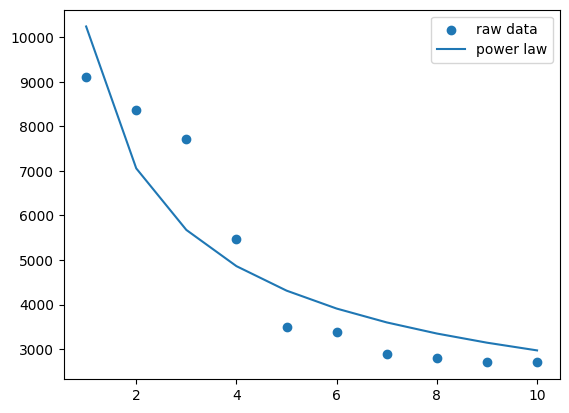

In [19]:
# optionally plot
import matplotlib.pyplot as plt
plt.scatter(X,Y, label="raw data")
plt.plot(X, powerlaw(X, params[0], params[1]), label="power law")
plt.legend()
plt.show()

## 2.5 Exercises

:::{exercise} Working effectively with dataframes

Recall the `curve_fit()` method from SciPy discussed above, and imagine that we want to fit powerlaws to every row in a large dataframe. How can this be done effectively?

First define the `powerlaw()` function and another function for fitting a row of numbers:
```python
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def powerlaw(x, A, s):
    return A * np.power(x, s)

def fit_powerlaw(row):
    X = np.arange(row.shape[0]) + 1.0
    params, cov = curve_fit(f=powerlaw, xdata=X, ydata=row, p0=[100, -1], bounds=(-np.inf, np.inf))
    return params[1]
```

Next load a dataset with multiple rows similar to the one used in the example above:
```python
df = pd.read_csv("https://raw.githubusercontent.com/ENCCS/hpda-python/main/content/data/results.csv")
# print first few rows
df.head()
```

Now consider these four different ways of fitting a powerlaw to each row of the dataframe:
```python
# 1. Loop

powers = []
for row_indx in range(df.shape[0]):
    row = df.iloc[row_indx,1:]
    p = fit_powerlaw(row)
    powers.append(p)
```

```python
# 2. `iterrows()

powers = []
for row_indx,row in df.iterrows():
    p = fit_powerlaw(row[1:])
    powers.append(p)
```

```python
# 3. `apply()

powers = df.iloc[:,1:].apply(fit_powerlaw, axis=1)
```

```python
# 4. `apply()` with `raw=True`

# raw=True passes numpy ndarrays instead of series to fit_powerlaw
powers = df.iloc[:,1:].apply(fit_powerlaw, axis=1, raw=True)
```

Which one do you think is most efficient? You can measure the execution time by adding `%%timeit` to the first line of a Jupyter code cell. More on timing and profiling in a later episode.

:::

:::{solution} Working effectively with dataframes

The execution time for four different methods are described below. Note that you may get different numbers when you run these examples.

```python
# 1 Loop

%%timeit
powers = []
for row_indx in range(df.shape[0]):
   row = df.iloc[row_indx,1:]
   p = fit_powerlaw(row)
   powers.append(p)

# 33.6 ms ± 682 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

```python
# 2. `iterrows()`

%%timeit
powers = []
for row_indx,row in df.iterrows():
   p = fit_powerlaw(row[1:])
   powers.append(p)

# 28.7 ms ± 947 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

```python
# 3. `apply()`

%%timeit
powers = df.iloc[:,1:].apply(fit_powerlaw, axis=1)

# 26.1 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

```python
# 4. `apply()` with `raw=True`

%%timeit
powers = df.iloc[:,1:].apply(fit_powerlaw, axis=1, raw=True)

# 24 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

:::

:::{exercise} Further analysis of Titanic passenger list dataset

Consider the titanic dataset.
> If you haven’t done so already, load it into a dataframe before the exercises:
> 
> `import pandas as pd; url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"; titanic = pd.read_csv(url, index_col="Name")`
- Compute the mean age of the first 10 passengers by slicing and the `mean` method
- Using boolean indexing, compute the survival rate (mean of “Survived” values) among passengers over and under the average age.
Now investigate the family size of the passengers (*i.e.* the “SibSp” column):
- What different family sizes exist in the passenger list?
    - **Hint**: try the `unique()` method
- What are the names of the people in the largest family group?
- (Advanced) Create histograms showing the distribution of family sizes for passengers split by the fare, i.e. one group of high-fare passengers (where the fare is above average) and one for low-fare passengers
    - **Hint**: instead of an existing column name, you can give a lambda function as a parameter to `hist` to compute a value on the fly. For example `lambda x: "Poor" if titanic["Fare"].loc[x] < titanic["Fare"].mean() else "Rich"`).

:::

:::{solution}

1. Mean age of the first 10 passengers: 
	- `titanic.iloc[:10,:]["Age"].mean()` or 
	- `titanic.iloc[:10,4].mean()` or 
	- `titanic.loc[:"Nasser, Mrs. Nicholas (Adele Achem)", "Age"].mean()`

2. Survival rate among passengers over and under average age:
	- `titanic[titanic["Age"] > titanic["Age"].mean()]["Survived"].mean()` and 
	- `titanic[titanic["Age"] < titanic["Age"].mean()]["Survived"].mean()`

3. Existing family sizes: `titanic["SibSp"].unique()`

4. Names of members of largest family(ies): `titanic[titanic["SibSp"] == 8].index`

5. `titanic.hist("SibSp", lambda x: "Poor" if titanic["Fare"].loc[x] < titanic["Fare"].mean() else "Rich", rwidth=0.9)`

:::

:::{keypoints}

- NumPy provides a static array data structure, fast mathematical operations for arrays and tools for linear algebra and random numbers
- Pandas dataframes are a good data structure for tabular data
- Dataframes allow both simple and advanced analysis in very compact form
- SciPy contains a lot of interfaces to battle-tested numerical routines

:::

:::{note} References

- [Introduction to running R, Python, Julia, and Matlab in HPC](https://uppmax.github.io/R-python-julia-matlab-HPC/)
- [Practical Intro to GPU Programming using Python](https://github.com/ENCCS/webinar_documents/tree/main/2024-oct-24-python)
- [Using Python in an HPC environment](https://uppmax.github.io/HPC-python/)
- [Python for Scientific Computing](https://aaltoscicomp.github.io/python-for-scicomp/)
- ...

:::